In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [7]:
# Load the sales data into a pandas DataFrame
sales_data = pd.read_csv('salesspc.csv')

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Invoice Number       444 non-null    object
 1   Bill Date            444 non-null    object
 2   Material             444 non-null    object
 3   Basic Sales Value    444 non-null    int64 
 4   Net Amount           444 non-null    int64 
 5   IGST Amt             444 non-null    int64 
 6   Gross amt            444 non-null    int64 
 7   Cust number          444 non-null    object
 8   Customer             444 non-null    object
 9   Sales order no       444 non-null    object
 10  Plant                444 non-null    object
 11  Business group name  444 non-null    object
dtypes: int64(4), object(8)
memory usage: 41.8+ KB


In [8]:
# Compute the demand column by summing the basic sales value for each day and each product
demand = sales_data.groupby(['Bill Date', 'Material'])['Basic Sales Value'].sum().reset_index()
demand = demand.rename(columns={'Basic Sales Value': 'demand'})



In [9]:
# Merge the demand column back into the sales data
sales_data = pd.merge(sales_data, demand, on=['Bill Date', 'Material'])

# Convert the 'Bill Date' column to a datetime object
sales_data['Bill Date'] = pd.to_datetime(sales_data['Bill Date'],infer_datetime_format=True)


C:\Users\PREETHIMA KRISHNA\AppData\Local\Temp\ipykernel_18052\2639753174.py:5: UserWarning: Parsing '13-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales_data['Bill Date'] = pd.to_datetime(sales_data['Bill Date'],infer_datetime_format=True)
C:\Users\PREETHIMA KRISHNA\AppData\Local\Temp\ipykernel_18052\2639753174.py:5: UserWarning: Parsing '16-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales_data['Bill Date'] = pd.to_datetime(sales_data['Bill Date'],infer_datetime_format=True)
C:\Users\PREETHIMA KRISHNA\AppData\Local\Temp\ipykernel_18052\2639753174.py:5: UserWarning: Parsing '17-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales_data['Bill Date'] = pd.to_datetime(sales_data['Bill Date'],infer_datetime_format=True)
C:\Users\PREETHIMA KRISHNA\AppData\Local\Temp\ipykernel_18052\2639753174.py:5: 

In [10]:
# Create time-related features from the 'Bill Date' column
sales_data['year'] = sales_data['Bill Date'].dt.year
sales_data['month'] = sales_data['Bill Date'].dt.month
sales_data['day'] = sales_data['Bill Date'].dt.day
sales_data['weekday'] = sales_data['Bill Date'].dt.weekday



In [11]:
# Create a list of input features and target variable
features = ['year', 'month', 'day', 'weekday', 'Basic Sales Value', 'Net Amount', 'IGST Amt', 'Gross amt']
target = 'demand'



In [12]:
# Initialize a dictionary to store future sales predictions for each product
future_sales_predictions = {}

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Invoice Number       444 non-null    object        
 1   Bill Date            444 non-null    datetime64[ns]
 2   Material             444 non-null    object        
 3   Basic Sales Value    444 non-null    int64         
 4   Net Amount           444 non-null    int64         
 5   IGST Amt             444 non-null    int64         
 6   Gross amt            444 non-null    int64         
 7   Cust number          444 non-null    object        
 8   Customer             444 non-null    object        
 9   Sales order no       444 non-null    object        
 10  Plant                444 non-null    object        
 11  Business group name  444 non-null    object        
 12  demand               444 non-null    int64         
 13  year                 444 non-null  

In [13]:
# Iterate over unique products in the sales data
unique_products = sales_data['Material'].unique()
for product in unique_products:
    # Filter the sales data for the current product
    product_data = sales_data[sales_data['Material'] == product]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(product_data[features], product_data[target], test_size=0.2, random_state=42)
    
    # Create and train the random forest regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate the model's performance on the testing data
    score = model.score(X_test, y_test)
    print('Model R-squared score for', product, ':', score)
    
    # Use the trained model to make predictions on future data for the current product
    future_dates = pd.date_range('2023-05-12', '2023-06-12', freq='D')
    future_data = pd.DataFrame({'year': future_dates.year, 'month': future_dates.month, 'day': future_dates.day, 'weekday': future_dates.weekday, 'Basic Sales Value': 100, 'Net Amount': 80, 'IGST Amt': 10, 'Gross amt': 90})
    future_predictions = model.predict(future_data)
    
    # Store the future sales predictions for the current product
    future_sales_predictions[product] = future_predictions


Model R-squared score for  BH150E Electric Dump Truck  : 0.9307071704697583
Model R-squared score for BE1800E Electric Excavator  : 0.9677103721056222
Model R-squared score for  BD50 Bulldozer  : 0.7320581773430104
Model R-squared score for BH205E Electric Haul Truck  : 0.5191277326339625
Model R-squared score for BG605 Motor Grader  : -1.6350755335689047
Model R-squared score for BH200E Electric Excavator  : 0.7018078286103435
Model R-squared score for BD80 Bulldozer  : 0.7143153744738151
Model R-squared score for BH300E Electric Excavator  : 0.36155778964836804
Model R-squared score for BH205i Haul Truck  : 0.6786248902609948
Model R-squared score for BPR45 Piling Rig  : 0.940850479247274
Model R-squared score for BH100E Electric Dump Truck  : 0.7711465240227554
Model R-squared score for BH85E Electric Bulldozer  : 0.5506279531772493
Model R-squared score for BG405A Motor Grader  : 0.9739228417815423
Model R-squared score for BH150E AC Electric Dump Truck  : 0.8818927144083445


In [14]:

# Print the future sales predictions for all products
for product, predictions in future_sales_predictions.items():
    future_dates = pd.date_range('2023-05-12', '2023-06-12', freq='D')
    future_sales = pd.DataFrame({'Product': product, 'Date': future_dates, 'demand': predictions})
    print(future_sales)


                         Product       Date     demand
0    BH150E Electric Dump Truck  2023-05-12  3731000.0
1    BH150E Electric Dump Truck  2023-05-13  3622000.0
2    BH150E Electric Dump Truck  2023-05-14  3633000.0
3    BH150E Electric Dump Truck  2023-05-15  3280000.0
4    BH150E Electric Dump Truck  2023-05-16  3280000.0
5    BH150E Electric Dump Truck  2023-05-17  3498000.0
6    BH150E Electric Dump Truck  2023-05-18  3687000.0
7    BH150E Electric Dump Truck  2023-05-19  3949000.0
8    BH150E Electric Dump Truck  2023-05-20  3840000.0
9    BH150E Electric Dump Truck  2023-05-21  4069000.0
10   BH150E Electric Dump Truck  2023-05-22  3934000.0
11   BH150E Electric Dump Truck  2023-05-23  3934000.0
12   BH150E Electric Dump Truck  2023-05-24  4043000.0
13   BH150E Electric Dump Truck  2023-05-25  4232000.0
14   BH150E Electric Dump Truck  2023-05-26  4385000.0
15   BH150E Electric Dump Truck  2023-05-27  4276000.0
16   BH150E Electric Dump Truck  2023-05-28  4287000.0
17   BH150

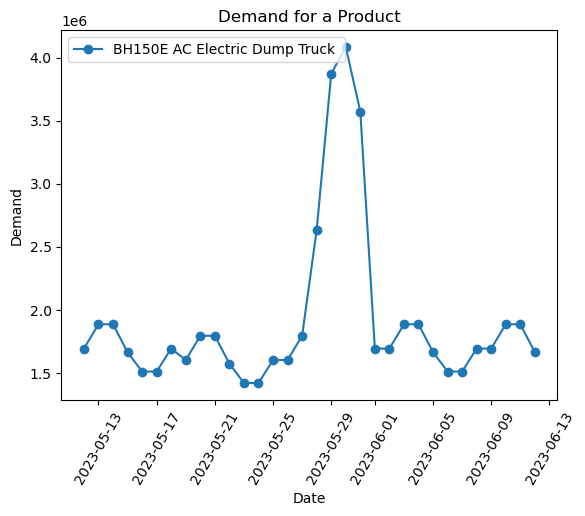

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'Date' column to datetime format
future_sales['Date'] = pd.to_datetime(future_sales['Date'])

# Sort the data by date
future_sales.sort_values('Date', inplace=True)

# Iterate over unique products
for product in future_sales['Product'].unique():
    # Filter the data for the current product
    product_data = future_sales[future_sales['Product'] == product]
    
    # Create the line plot for the current product
    plt.plot(product_data['Date'], product_data['demand'], marker='o', label=product)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand for a Product')
plt.legend()
plt.xticks(rotation=60)

# Display the plot
plt.show()
